In [5]:
from scipy.stats import norm
import numpy 
import matplotlib.pylab as plt
%matplotlib inline

In [6]:
# create a brownian motion S_n
# increment function
def BM(S0):
    S0 = numpy.asarray(S0)
    # new increments: 1 wp 1/2, -1 wp 1/2
    u = numpy.random.uniform(0, 1, size = S0.shape)
    dS = numpy.floor(u - 0.5)
    dS[dS == 0] = 1
    
    return S0 + dS  

#function for calculating S_n
def S_N(starting_val, T, N, num):
    
    #size of time steps
    dt = T / N   
    
    S = numpy.zeros((num, N+1))
    S[:, 0] = starting_val * numpy.ones(num)
    
    for k in range(1, N+1):
        #calculate S_n using new increments
        S[:, k] = BM(S[:, k-1])
    
    return S  

Text(0, 0.5, 'S')

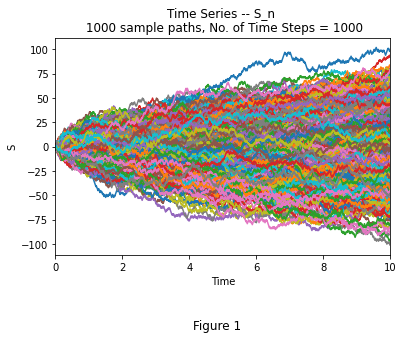

In [7]:
#plot S_n
#define parameters
T = 10
num = 1000  # number of sample paths
start = 0
N = 1000   # number of time steps


S = S_N(start, T, N, num)
t = numpy.linspace(0.0, T, N+1)

# plot results
fig = plt.figure()
fig.suptitle('Figure 1', y = -0.1)

for k in range(num):
    plt.plot(t, S[k, :])

# plot labels
plt.title(f'Time Series -- S_n \n {num} sample paths, No. of Time Steps = {N}')
plt.xlabel('Time')
plt.xlim(numpy.amin(t),numpy.amax(t))
plt.ylabel('S')

Text(0, 0.5, 'X')

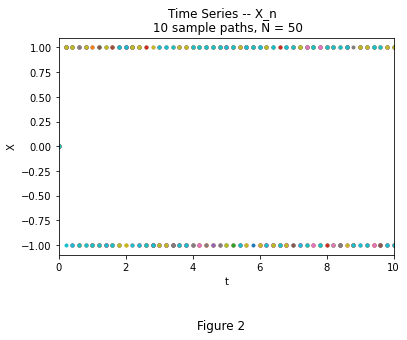

In [8]:
#generate X_n, the increments of S_n
def Xn(S, N):
    Xn = numpy.zeros(S.shape)
    
    for k in range(1, N+1):
        Xn[:,k] = S[:, k] - S[:, k-1]  
    return Xn

# get increments
X = Xn(S_N(start, T, 50, 10), 50)

# plot results
fig = plt.figure()
fig.suptitle('Figure 2', y=-0.1)

for k in range(10):
    plt.plot(numpy.linspace(0, T, 51), X[k, :], '.')

# plot labels
plt.title('Time Series -- X_n  \n 10 sample paths, N = 50')
plt.xlabel('t')
plt.xlim(numpy.amin(t), numpy.amax(t))
plt.ylabel('X')

Text(0, 0.5, 'C_N')

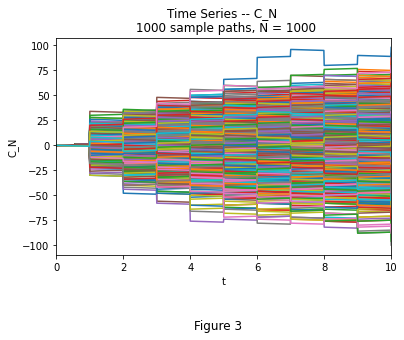

In [9]:
# generate C_N, a step function approximation of the brownian motion 
def C_N(Sn, t, N):
    
    # get increments
    X = Xn(Sn, N)
    
    # initialize array
    C = numpy.zeros(Sn.shape)
    
    # floor function of t
    t_bottom = numpy.floor(t)  
    
    # add one
    t_bottom_plus_one = t_bottom + 1   
    
    # locate the indices where t is integer
    t_index = numpy.where(t == t_bottom)[0] 
    
    # get all indices for floor of t
    t_bottom_index = t_bottom * t_index[1] 
    
    # do same for floor of t plus one
    t_bottom_plus_one_index = t_bottom_plus_one * t_index[1] 
    
    # set C_N(T) as S_N(T) by formula of C_N
    C[:, N] = Sn[:, int(t_bottom_index[N])] 
    
    # loop and calculate C_n by formula for C_n
    for k in range(1, N):        
        # C_N formula
        C[:, k] = Sn[:, int(t_bottom_index[k])] + (t[k] - t_bottom[k]) * X[:, int(t_bottom_plus_one_index[k])]
        
    return C

# get C_n
C = C_N(S,t,N)

# plot results
fig = plt.figure()
fig.suptitle('Figure 3',y=-0.1)

for k in range(num):
    plt.plot(t,C[k,:])

# plot labels
plt.title('Time Series -- C_N \n 1000 sample paths, N = 1000')
plt.xlabel('t')
plt.xlim(numpy.amin(t),numpy.amax(t))
plt.ylabel('C_N')


Text(0, 0.5, 'Ĉ')

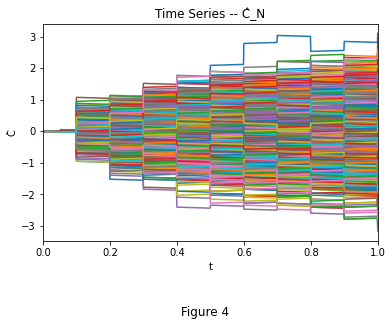

In [10]:
# get C_hat_n, C_n scaled down so that T = 1
# want to rescale from [0,N] to [0,1]

# horizontal scaling, i.e time scaling
s = t * 0.1

# vertical scaling, i.e scaling of C_n
C_hat = 1/numpy.sqrt(N)* C   

# plot results
fig = plt.figure()
fig.suptitle('Figure 4',y = -0.1)

for k in range(num):
    plt.plot(s,C_hat[k,:])

# plot labels
plt.title('Time Series -- C\u0302_N')
plt.xlabel('t')
plt.xlim(numpy.amin(s),numpy.amax(s))
plt.ylabel('C\u0302')    

In [11]:
# Time to analyse distribution of C_hat_n

# plot distribution of C_hat_N(t = 1) for different number of sample paths
S1 = S_N(start, T, N, 10)
S2 = S_N(start, T, N, 100)
S3 = S_N(start, T, N, 1000)
S4 = S_N(start, T, N, 100000)

# scale to get C_hat_n
C_hat1 = 1 / numpy.sqrt(N) * C_N(S1, t, N)
C_hat2 = 1 / numpy.sqrt(N) * C_N(S2, t, N)
C_hat3 = 1 / numpy.sqrt(N) * C_N(S3, t, N)
C_hat4 = 1 / numpy.sqrt(N) * C_N(S4, t, N)

# get meanss and variance of C_hat_N(t=1)
mean1 = numpy.mean(C_hat1[:, N])
mean2 = numpy.mean(C_hat2[:, N])
mean3 = numpy.mean(C_hat3[:, N])
mean4 = numpy.mean(C_hat4[:, N])

var1 = numpy.var(C_hat1[:, N])
var2 = numpy.var(C_hat2[:, N])
var3 = numpy.var(C_hat3[:, N])
var4 = numpy.var(C_hat4[:, N])


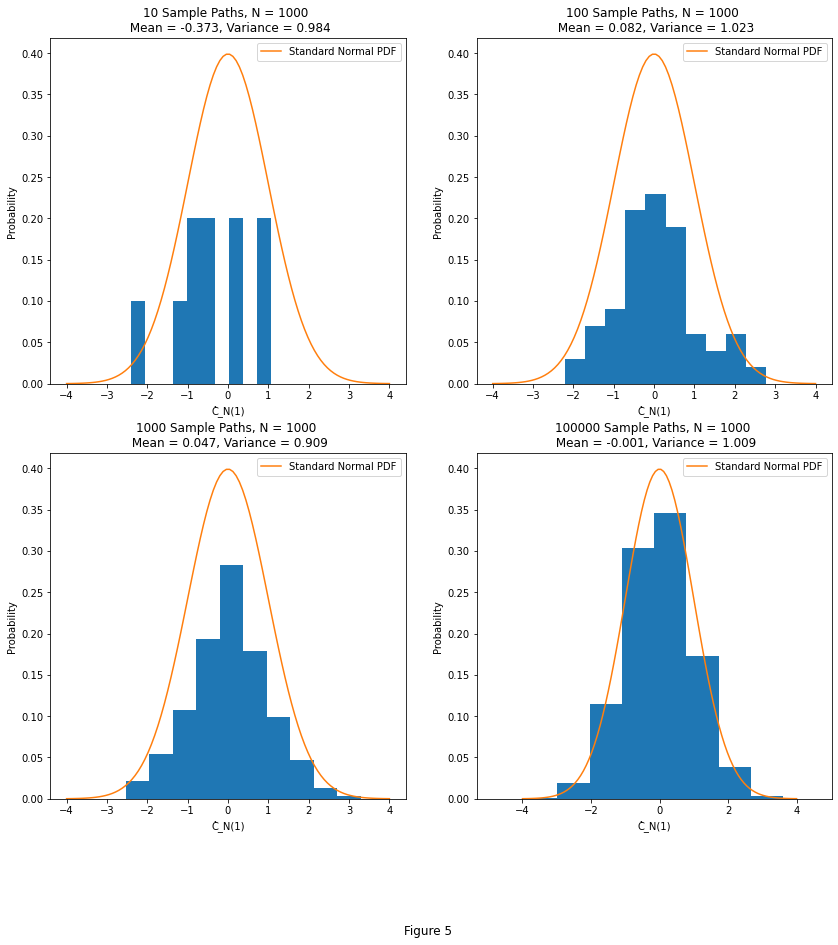

In [12]:
# plot distributions of C_hat_N(t = 1) as number of realisations increases
# get weights for histogram
weights1 = numpy.ones_like(C_hat1[:, N]) / float(len(C_hat1[:, N]))
weights2 = numpy.ones_like(C_hat2[:, N]) / float(len(C_hat2[:, N]))
weights3 = numpy.ones_like(C_hat3[:, N]) / float(len(C_hat3[:, N]))
weights4 = numpy.ones_like(C_hat4[:, N]) / float(len(C_hat4[:, N]))

x = numpy.linspace(-4, 4, 100)

# set plot axes
fig, (ax1, ax2) = plt.subplots(2, 2, figsize = (14, 14))

fig.suptitle('Figure 5', y = 0)

ax1[0].hist(C_hat1[:, N], bins=10, weights = weights1)
ax1[1].hist(C_hat2[:, N], bins=10, weights = weights2)
ax2[0].hist(C_hat3[:, N], bins=10, weights = weights3)
ax2[1].hist(C_hat4[:, N], bins=10, weights = weights4)

ax1[0].set_title('10 Sample Paths, N = 1000 \n Mean = %1.3f, Variance = %1.3f' % (mean1, var1))
ax1[1].set_title('100 Sample Paths, N = 1000 \n Mean = %1.3f, Variance = %1.3f' % (mean2, var2))
ax2[0].set_title('1000 Sample Paths, N = 1000 \n Mean = %1.3f, Variance = %1.3f' % (mean3, var3))
ax2[1].set_title('100000 Sample Paths, N = 1000 \n Mean = %1.3f, Variance = %1.3f' % (mean4, var4))

for i in range(2):
    ax1[i].plot(x, norm.pdf(x, 0, 1), label = 'Standard Normal PDF')
    ax1[i].set_xlabel('C\u0302_N(1)')   #u0302 puts a hat on C
    ax1[i].set_ylabel('Probability')
    ax1[i].legend()
    
for i in range(2):
    ax2[i].plot(x, norm.pdf(x, 0, 1), label = 'Standard Normal PDF')
    ax2[i].set_xlabel('C\u0302_N(1)')
    ax2[i].set_ylabel('Probability')
    ax2[i].legend()

C_hat converges in distribution to a random variable on C([0,1], R) if the limit of the cumulative distribution of C_hat_N(t) (t in [0,1]) as N tends to infinity is equal to the cumulative distribution of the random variable.

In [13]:
# show cumulative distribution of C_hat_N(t=1) as number of sample paths increases
# sort data in increasing order
data_sorted1 = numpy.sort(C_hat1[:, N])
data_sorted2 = numpy.sort(C_hat2[:, N])
data_sorted3 = numpy.sort(C_hat3[:, N])
data_sorted4 = numpy.sort(C_hat4[:, N])

#get cumulative probabilities
p1 = 1. * numpy.arange(len(C_hat1[:, N])) / (len(C_hat1[:, N]) - 1)
p2 = 1. * numpy.arange(len(C_hat2[:, N])) / (len(C_hat2[:, N]) - 1)
p3 = 1. * numpy.arange(len(C_hat3[:, N])) / (len(C_hat3[:, N]) - 1)
p4 = 1. * numpy.arange(len(C_hat4[:, N])) / (len(C_hat4[:, N]) - 1)

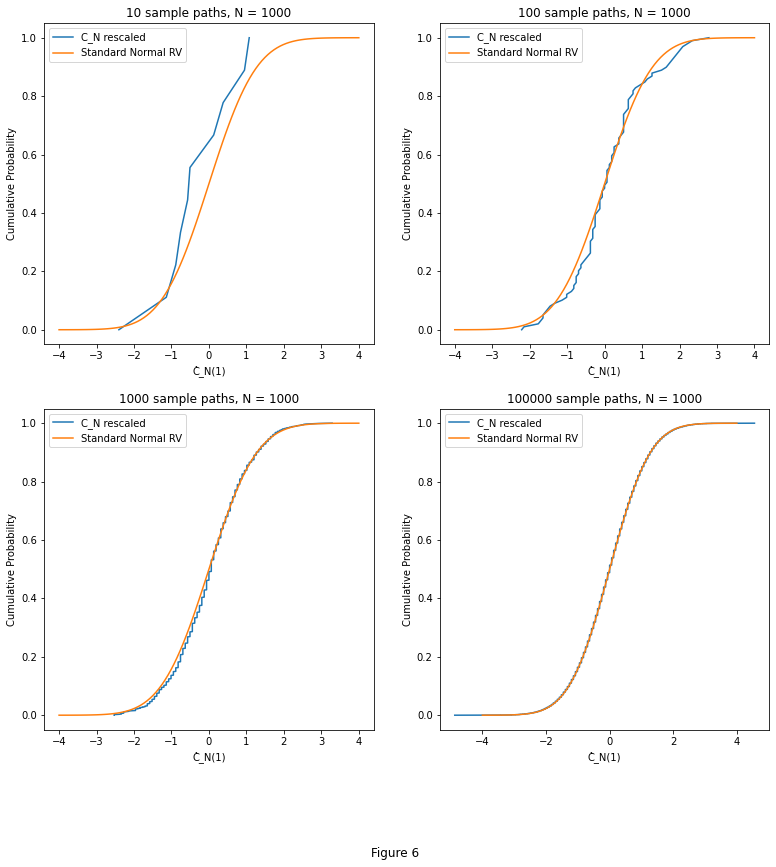

In [14]:
# plot convergence
fig, (ax1, ax2) = plt.subplots(2, 2,figsize = (13, 13))
fig.suptitle('Figure 6', y = 0)
    
ax1[0].plot(data_sorted1, p1, label = 'C_N rescaled')
ax1[0].set_title('10 sample paths, N = 1000')
ax1[1].plot(data_sorted2, p2, label = 'C_N rescaled')
ax1[1].set_title('100 sample paths, N = 1000')
ax2[0].plot(data_sorted3, p3, label = 'C_N rescaled')
ax2[0].set_title('1000 sample paths, N = 1000')
ax2[1].plot(data_sorted4, p4, label = 'C_N rescaled')
ax2[1].set_title('100000 sample paths, N = 1000')

for i in range(2):
    ax1[i].plot(x,norm.cdf(x,0,1),label = 'Standard Normal RV')
    ax1[i].set_xlabel('C\u0302_N(1)')
    ax1[i].set_ylabel('Cumulative Probability')
    ax1[i].legend()
    
for i in range(2):
    ax2[i].plot(x, norm.cdf(x, 0, 1), label = 'Standard Normal RV')
    ax2[i].set_xlabel('C\u0302_N(1)')
    ax2[i].set_ylabel('Cumulative Probability')
    ax2[i].legend()

Gets closer to true probabilities as sample size increases, not smooth. Now increase N (time steps get smaller).

In [15]:
# show how CDF converges as N increases (time step gets smaller)
N1 = 100
N2 = 1000
N3 = 100000


t1 = numpy.linspace(0.0, T, N1 + 1)
t2 = numpy.linspace(0.0, T, N2 + 1)
t3 = numpy.linspace(0.0, T, N3 + 1)

S5 = S_N(start, T, N1, 200)
S6 = S_N(start,T, N2, 200)
S7 = S_N(start, T, N3, 200)

C_hat5 = 1 / numpy.sqrt(N1) * C_N(S5, t1, N1)
C_hat6 = 1 / numpy.sqrt(N2) * C_N(S6, t2, N2)
C_hat7 = 1 / numpy.sqrt(N3) * C_N(S7, t3, N3)


data_sorted5 = numpy.sort(C_hat5[:, N1])
data_sorted6 = numpy.sort(C_hat6[:, N2])
data_sorted7 = numpy.sort(C_hat7[:, N3])


p5 = 1. * numpy.arange(len(C_hat5[:, N1])) / (len(C_hat5[:, N1]) - 1)
p6 = 1. * numpy.arange(len(C_hat6[:, N2])) / (len(C_hat6[:, N2]) - 1)
p7 = 1. * numpy.arange(len(C_hat7[:, N3])) / (len(C_hat7[:, N3]) - 1)


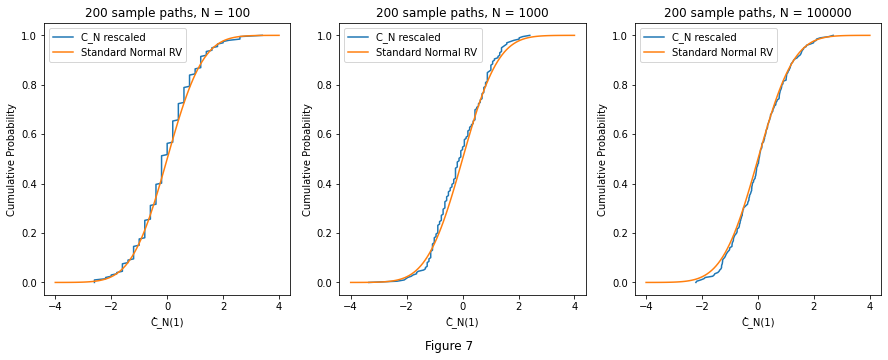

In [16]:
# plot results
fig, ax1 = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Figure 7', y = 0)

ax1[0].plot(data_sorted5, p5, label = 'C_N rescaled')
ax1[0].set_title('200 sample paths, N = 100')
ax1[1].plot(data_sorted6, p6, label = 'C_N rescaled')
ax1[1].set_title('200 sample paths, N = 1000')
ax1[2].plot(data_sorted7, p7, label = 'C_N rescaled')
ax1[2].set_title('200 sample paths, N = 100000')

for i in range(3):
    ax1[i].plot(x, norm.cdf(x, 0, 1), label = 'Standard Normal RV')
    ax1[i].set_xlabel('C\u0302_N(1)')
    ax1[i].set_ylabel('Cumulative Probability')
    ax1[i].legend() 

As you can see, the distribution function becomes smoother as time steps get smaller! Finally, we'll show overall convergence for large number of sample paths.

In [17]:
S9 = S_N(start, T, 100, 5000)
S10 = S_N(start,T, 1000, 5000)
S11 = S_N(start, T, 100000, 5000)

t5 = numpy.linspace(0, T, 101)
t6 = numpy.linspace(0, T, 1001)
t7 = numpy.linspace(0, T, 100001)

C_hat9 = 1 / numpy.sqrt(100) * C_N(S9, t5, 100)
C_hat10 = 1 / numpy.sqrt(1000) * C_N(S10, t6, 1000)
C_hat11 = 1 / numpy.sqrt(100000) * C_N(S11, t7, 100000)

data_sorted9 = numpy.sort(C_hat9[:, 100])
data_sorted10 = numpy.sort(C_hat10[:, 1000])
data_sorted11 = numpy.sort(C_hat11[:, 100000])

p9 = 1. * numpy.arange(len(C_hat9[:, 100])) / (len(C_hat9[:, 100]) - 1)
p10 = 1. * numpy.arange(len(C_hat10[:, 1000])) / (len(C_hat10[:, 1000]) - 1)
p11 = 1. * numpy.arange(len(C_hat11[:, 100000])) / (len(C_hat11[:, 100000]) - 1)

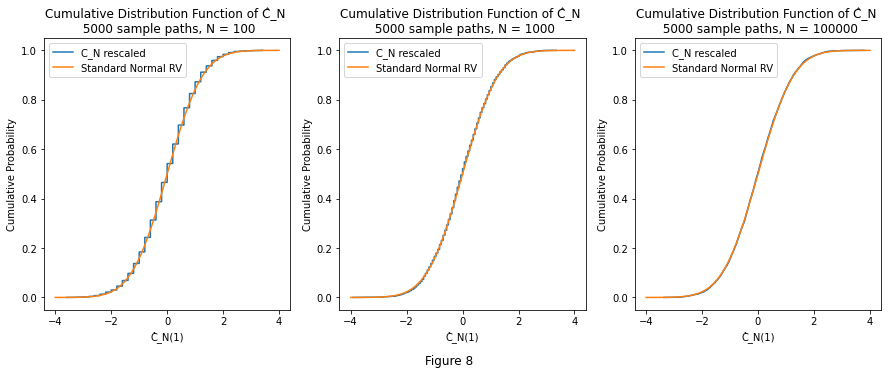

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Figure 8', y = 0)

ax[0].plot(data_sorted9, p9, label = 'C_N rescaled')
ax[0].set_title('Cumulative Distribution Function of C\u0302_N \n 5000 sample paths, N = 100')
ax[1].plot(data_sorted10, p10, label = 'C_N rescaled')
ax[1].set_title('Cumulative Distribution Function of C\u0302_N \n 5000 sample paths, N = 1000')
ax[2].plot(data_sorted11, p11, label = 'C_N rescaled')
ax[2].set_title('Cumulative Distribution Function of C\u0302_N \n 5000 sample paths, N = 100000')

for i in range(3):
    ax[i].plot(x, norm.cdf(x, 0, 1), label = 'Standard Normal RV')
    ax[i].set_xlabel('C\u0302_N(1)')
    ax[i].set_ylabel('Cumulative Probability')
    ax[i].legend()

We have shown convergence in distribution of C_hat_N(t=1)! Now, check for other t, claim that C_hat_N(t) ~ N(0,(sqrt((floor(t))))^2) where floor(t) rounds t down to the nearest decimal. Experiment for t=0.5 and for t = 0.58 as examples.

In [19]:
t1 = 0.5
t2 = 0.58

# do same as before n
C_hat_t1_ex1 = C_hat9[:, int(t1 * N1)]
C_hat_t1_ex2 = C_hat10[:, int(t1 * N2)]
C_hat_t1_ex3 = C_hat11[:, int(t1 * N3)]

C_hat_t2_ex1 = C_hat9[:, int(t2 * N1)]
C_hat_t2_ex2 = C_hat10[:,int(t2 * N2)]
C_hat_t2_ex3 = C_hat11[:, int(t2 * N3)]

data_sorted_t1_ex1 = numpy.sort(C_hat_t1_ex1)
data_sorted_t1_ex2 = numpy.sort(C_hat_t1_ex2)
data_sorted_t1_ex3 = numpy.sort(C_hat_t1_ex3)

data_sorted_t2_ex1 = numpy.sort(C_hat_t2_ex1)
data_sorted_t2_ex2 = numpy.sort(C_hat_t2_ex2)
data_sorted_t2_ex3 = numpy.sort(C_hat_t2_ex3)

p_t1_ex1 = 1. * numpy.arange(len(C_hat_t1_ex1)) / (len(C_hat_t1_ex1) - 1)
p_t1_ex2 = 1. * numpy.arange(len(C_hat_t1_ex2)) / (len(C_hat_t1_ex2) - 1)
p_t1_ex3 = 1. * numpy.arange(len(C_hat_t1_ex3)) / (len(C_hat_t1_ex3) - 1)

p_t2_ex1 = 1. * numpy.arange(len(C_hat_t2_ex1)) / (len(C_hat_t2_ex1) - 1)
p_t2_ex2 = 1. * numpy.arange(len(C_hat_t2_ex2)) / (len(C_hat_t2_ex2) - 1)
p_t2_ex3 = 1. * numpy.arange(len(C_hat_t2_ex3)) / (len(C_hat_t2_ex3) - 1)

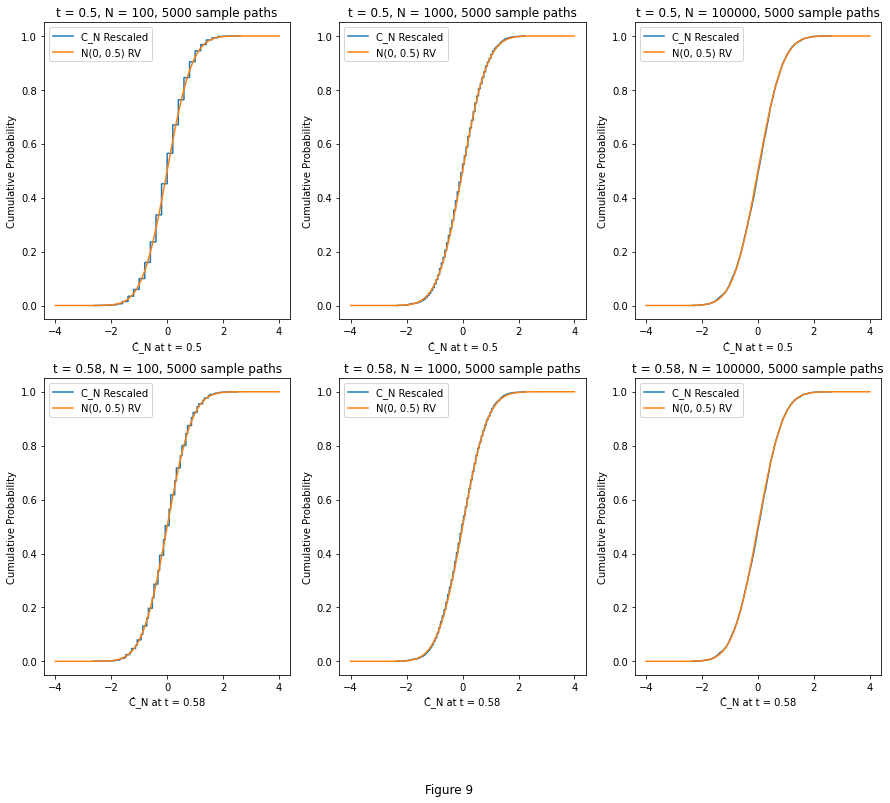

In [20]:
# plot results
fig, (ax1, ax2) = plt.subplots(2, 3,figsize = (15, 12))
fig.suptitle('Figure 9', y = 0)

ax1[0].plot(data_sorted_t1_ex1, p_t1_ex1, label = 'C_N Rescaled')
ax1[1].plot(data_sorted_t1_ex2, p_t1_ex2,label = 'C_N Rescaled')
ax1[2].plot(data_sorted_t1_ex3, p_t1_ex3, label = 'C_N Rescaled')
ax2[0].plot(data_sorted_t2_ex1, p_t2_ex1,label = 'C_N Rescaled')
ax2[1].plot(data_sorted_t2_ex2, p_t2_ex2,label = 'C_N Rescaled')
ax2[2].plot(data_sorted_t2_ex3, p_t2_ex3,label = 'C_N Rescaled')


ax1[0].set_xlabel('C\u0302_N(t=0.5)')
ax1[0].set_title('t = 0.5, N = 100, 5000 sample paths')
ax1[1].set_title('t = 0.5, N = 1000, 5000 sample paths')
ax1[2].set_title('t = 0.5, N = 100000, 5000 sample paths')
ax2[0].set_title('t = 0.58, N = 100, 5000 sample paths')
ax2[1].set_title('t = 0.58, N = 1000, 5000 sample paths')
ax2[2].set_title('t = 0.58, N = 100000, 5000 sample paths')

for i in range(3):
    ax1[i].plot(x, norm.cdf(x, 0, numpy.sqrt(numpy.floor(10 * t1) / 10)), label = 'N(0, 0.5) RV')
    ax1[i].set_ylabel('Cumulative Probability')
    ax1[i].set_xlabel('C\u0302_N at t = 0.5')
    ax1[i].legend()
    ax2[i].plot(x, norm.cdf(x, 0, numpy.sqrt(numpy.floor(10 * t2) / 10)), label = 'N(0, 0.5) RV')
    ax2[i].set_xlabel('C\u0302_N at t = 0.58')
    ax2[i].set_ylabel('Cumulative Probability')
    ax2[i].legend()
#
# 
#

Same result holds for other t in [0,1]. C_hat_N(t) converges in distribution to a Normal random variable with mean 0 and variance floor(t) where floor(t) rounds t down to nearest decimal place. We now show approximation of the final random variable.

In [21]:
def RV(num, N, T):
    t = numpy.linspace(0, T, N+1)
    y = numpy.zeros((num, N + 1))
    Bt = numpy.zeros((num, N + 1))
    dt = T / N
    # generate wiener process/brownian motion
    for i in range(1, N + 1):
        Bt[:,i] = Bt[:, i - 1] + norm.rvs(size = y.shape[0], scale = numpy.sqrt(dt))
        y[:,  i] = numpy.sqrt(numpy.floor(10 * t[i]) / (10 * t[i])) * Bt[:, i]   #scaling for random variable
    return y
y = RV(5000, 10000, 1)

Variance at time 0.48 is 0.385076337016178


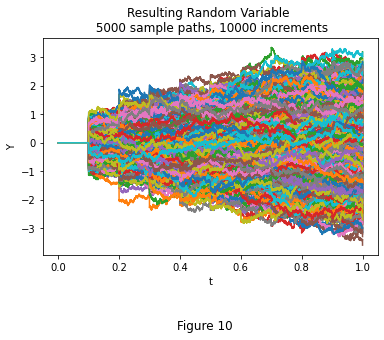

In [22]:
t = numpy.linspace(0, 1, 10001)
fig = plt.figure()
fig.suptitle('Figure 10', y = -0.1)

for i in range(5000):
    plt.plot(t, y[i, :])
    
plt.title('Resulting Random Variable \n 5000 sample paths, 10000 increments')
plt.xlabel('t')
plt.ylabel('Y')

print('Variance at time 0.48 is', numpy.var(y[:, 4800]))